<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/kaggle_4%EC%98%88%EC%A0%9C2_%EC%9C%A0%EB%A6%AC%EC%A2%85%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 37kB/s 
     |████████████████████████████████| 512kB 24.5MB/s 
     |████████████████████████████████| 3.8MB 38.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f030cdcb6f9ff30424a119493e49c9ed37b6c79955a3cf78957e001ee50d9572
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: 

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tf.set_random_seed(777)

In [0]:
# 데이터 확인, 분석을 위해 pandas 를 사용
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/multinomial/kaggle/예제2_유리종류.csv')
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

In [0]:
xy_df # 데이터프레임 확인

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


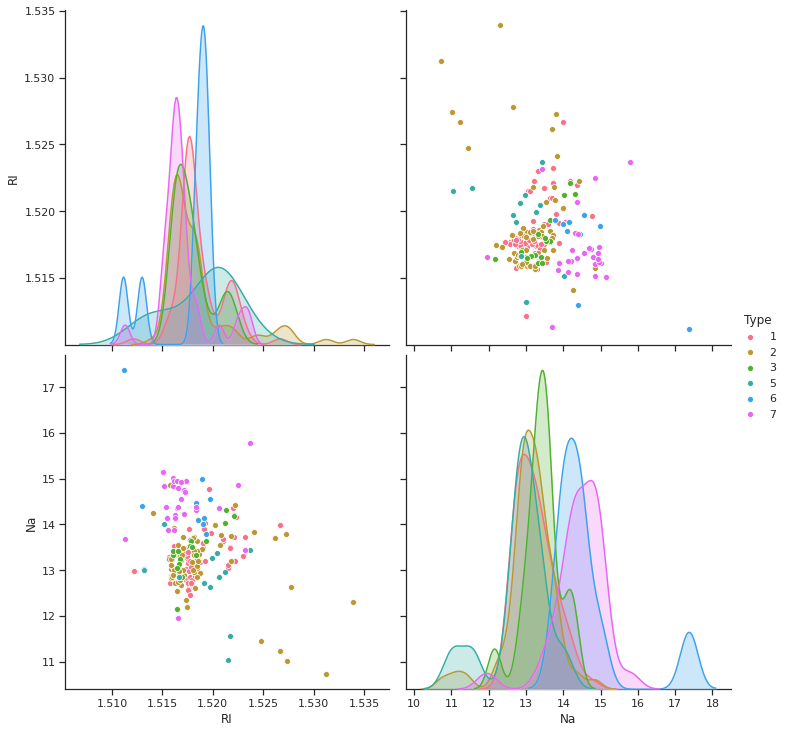

In [0]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(xy_df, vars=['RI','Na'],hue="Type", palette="husl", height=5)
plt.show()

In [0]:
pd.DataFrame(xy_df.mean(), columns=["평균 값"])

,평균 값
RI,1.518365
Na,13.407850
Mg,2.684533
Al,1.444907
Si,72.650935
K,0.497056
Ca,8.956963
Ba,0.175047
Fe,0.057009
Type,2.780374


In [0]:
pd.DataFrame(xy_df.min(), columns=["최솟 값"])

,최솟 값
RI,1.51115
Na,10.73000
Mg,0.00000
Al,0.29000
Si,69.81000
K,0.00000
Ca,5.43000
Ba,0.00000
Fe,0.00000
Type,1.00000


In [0]:
pd.DataFrame(xy_df.max(), columns=["최댓 값"])

,최댓 값
RI,1.53393
Na,17.38000
Mg,4.49000
Al,3.50000
Si,75.41000
K,6.21000
Ca,16.19000
Ba,3.15000
Fe,0.51000
Type,7.00000


In [0]:
# 레이블 인코딩 과정 (문자열(종류)을 대응하는 정수로 변경)
labelEncoder = LabelEncoder()

In [0]:
xy_df.iloc[:,[-1]] = labelEncoder.fit_transform(xy_df.iloc[:,[-1]]) # 레이블 인코딩

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
xy_df # 확인

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,5
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,5
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,5
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,5


In [0]:
y_data = xy_df.iloc[:,-1].values.reshape(-1,1)  # 레이블 데이터(종류)를 numpy로 추출

In [0]:
x_data = xy_df.iloc[:,:-1].values  # 피쳐데이터를 numpy로 추출

In [0]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(214, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [0]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(214, 9)
[[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
  8.75000e+00 0.00000e+00 0.00000e+00]
 [1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01 4.80000e-01
  7.83000e+00 0.00000e+00 0.00000e+00]
 [1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01 3.90000e-01
  7.78000e+00 0.00000e+00 0.00000e+00]
 [1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01 5.70000e-01
  8.22000e+00 0.00000e+00 0.00000e+00]
 [1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01 5.50000e-01
  8.07000e+00 0.00000e+00 0.00000e+00]
 [1.51596e+00 1.27900e+01 3.61000e+00 1.62000e+00 7.29700e+01 6.40000e-01
  8.07000e+00 0.00000e+00 2.60000e-01]
 [1.51743e+00 1.33000e+01 3.60000e+00 1.14000e+00 7.30900e+01 5.80000e-01
  8.17000e+00 0.00000e+00 0.00000e+00]]


In [0]:
np.unique(y_data, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([70, 76, 17, 13,  9, 29]))

In [0]:
# 테스트세트를 분리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=777) # 전체 데이터중 20%

In [0]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([56, 61, 14, 10,  7, 23]))

In [0]:
print("학습용 ",x_train.shape, "\t", y_train.shape) # 학습용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (171, 9) 	 (171, 1)
테스트용  (43, 9) 	 (43, 1)


In [0]:
scaler = StandardScaler()

In [0]:
nb_classes = 6 # 분류할 클래스의 개수

In [0]:
# 텐서플로우 그래프 그리기
num_x = x_data.shape[1]
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.int32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , nb_classes]), name='weight') 
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')

In [0]:
Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

In [0]:
#softmax 는 벡터 그대로 유지 시킨 상태에서 확률만 표시해 줌 
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

In [0]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
cost = tf.reduce_mean(cost_i)

In [0]:
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)

In [0]:
prediction = tf.argmax(hypothesis, 1)

In [0]:
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [0]:
n_fold = 5 # 5개의 폴드
skf = StratifiedKFold(n_splits=n_fold) 
cv_accuracy = [] # 폴드세트별 정확도를 저장할 리스트

In [0]:
epochs = 10001

for step in range(epochs):
  fold_cost = 0
  fold_accuracy = 0
  for train_index, test_index in skf.split(x_train, y_train):
    train_random_index = np.random.permutation(train_index)
    test_random_index = np.random.permutation(test_index)

     # 학습폴드, 검증폴드 분리(피쳐, 레이블 별)
    train_feature_fold, val_feature_fold = x_train[train_random_index], x_train[test_random_index]
    train_label_fold, val_label_fold = y_train[train_random_index], y_train[test_random_index]

    # 학습폴드를 기준으로 표준화
    scaler.fit(train_feature_fold)
    
    # 학습폴드를 기준으로 학습폴드, 검증폴드를 표준화
    train_feature_fold_scaled = scaler.transform(train_feature_fold) 
    val_feature_fold_scaled = scaler.transform(val_feature_fold) 

    # 학습폴드로 학습 
    cost_val, W_all, _ = sess.run([cost, W, train], feed_dict={X:train_feature_fold_scaled, Y:train_label_fold})

    fold_cost += cost_val
    w_history.append(W_all.copy())  

    # 폴드세트별 Accuracy 저장 
    fold_accuracy += sess.run(accuracy, feed_dict={X:val_feature_fold_scaled, Y:val_label_fold})


  cv_accuracy.append(fold_accuracy/n_fold) # epoch 별 검증폴드의 평균 Accuracy를 저장한다
  cost_list.append(fold_cost/n_fold) # epoch 별 학습폴드의 평균 cost를 저장한다

  if step % 200 == 0:
    print("step=",step,"\t cost=", fold_cost/n_fold, "\t accuracy=",str(fold_accuracy/n_fold*100)[:5], "%")

step= 0 	 cost= 3.0688172340393067 	 accuracy= 21.02 %
step= 200 	 cost= 2.6911243915557863 	 accuracy= 26.30 %
step= 400 	 cost= 2.382107305526733 	 accuracy= 31.56 %
step= 600 	 cost= 2.1256536483764648 	 accuracy= 35.05 %
step= 800 	 cost= 1.9126266241073608 	 accuracy= 38.58 %
step= 1000 	 cost= 1.7371308565139771 	 accuracy= 40.92 %
step= 1200 	 cost= 1.5921656847000123 	 accuracy= 40.92 %
step= 1400 	 cost= 1.4765639781951905 	 accuracy= 42.10 %
step= 1600 	 cost= 1.385649275779724 	 accuracy= 41.51 %
step= 1800 	 cost= 1.3121156215667724 	 accuracy= 43.83 %
step= 2000 	 cost= 1.2517844438552856 	 accuracy= 43.81 %
step= 2200 	 cost= 1.2019092559814453 	 accuracy= 45.57 %
step= 2400 	 cost= 1.1602947950363158 	 accuracy= 47.93 %
step= 2600 	 cost= 1.1251629114151 	 accuracy= 52.01 %
step= 2800 	 cost= 1.0951226949691772 	 accuracy= 52.60 %
step= 3000 	 cost= 1.0691188812255858 	 accuracy= 54.92 %
step= 3200 	 cost= 1.0463616371154785 	 accuracy= 57.27 %
step= 3400 	 cost= 1.02626

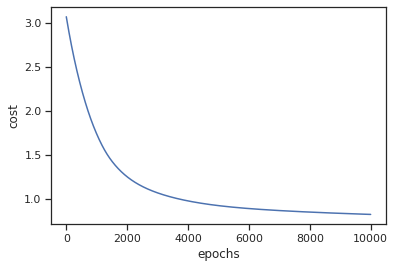

In [0]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

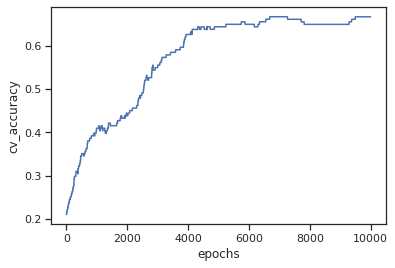

In [0]:
plt.plot(cv_accuracy)
plt.xlabel("epochs")
plt.ylabel("cv_accuracy")
plt.show()

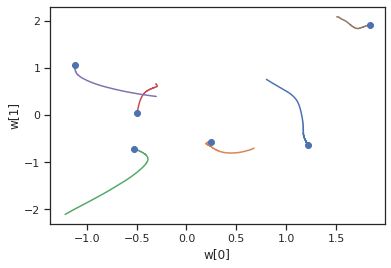

In [0]:
# 가중치 업데이트 과정 그래프 (꽃받침 길이, 꽃받침 너비)
w0 = []
w1 = []
for w in  w_history:
  w0.append(w[0])
  w1.append(w[1])
plt.plot(w0, w1)
plt.plot(w0[-1], w1[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[1]')
plt.show()

In [0]:
# 테스트 세트에 대한 정확도 구하기
x_test_scaled = scaler.transform(x_test)
a = sess.run(accuracy, feed_dict={X:x_test_scaled, Y:y_test})
print("정확도 : ", str(a*100)[:5], "%", sep="")

정확도 : 67.44%


In [0]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[1.5,13.4,2.6,1.4,72.6,0.4,8.9,0.1,0.05], 
                     [2.4,20.4,5.6,0.4,50.6,0.1,10.9,0.5,0.1], 
                     [1.515,13.24,3.49,1.47,73.25,0.38,8.03,0.0,0.0], 
                     [1.5,10.04,3.76,1.28,80.64,0.11,17.95,0.0,0.25], 
                     [1.5,13.4,2.6,1.4,96.6,0.4,8.9,0.1,0.05]]) 
X_test_5_scaled = scaler.transform(X_test_5)

In [0]:
print(sess.run(prediction, feed_dict={X:X_test_5_scaled}))

[4 5 1 3 5]


In [0]:
try:
  x_input = input("입력(Ri, Na, Mg, Al, Si, K, Ca, Ba, Fe): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
  print("Ri\tNa\tMg\tAl\tSi\tK\tCa\tBa,\tFe")
  for i in x_input_strip:
    print(i,end="\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = scaler.transform(x_input_test)

  print("예상 결과 : ", (sess.run(prediction, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")

입력(Ri, Na, Mg, Al, Si, K, Ca, Ba, Fe): 1.5,13.4,2.6,1.4,96.6,0.4,8.9,0.1,0.05
Ri	Na	Mg	Al	Si	K	Ca	Ba,	Fe
1.5	13.4	2.6	1.4	96.6	0.4	8.9	0.1	0.05	
예상 결과 :  [5]


In [0]:
result_df = pd.DataFrame(X_test_5, columns=['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])

In [0]:
result_df

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.500,13.40,2.60,1.40,72.60,0.40,8.90,0.1,0.05
1,2.400,20.40,5.60,0.40,50.60,0.10,10.90,0.5,0.10
2,1.515,13.24,3.49,1.47,73.25,0.38,8.03,0.0,0.00
3,1.500,10.04,3.76,1.28,80.64,0.11,17.95,0.0,0.25
4,1.500,13.40,2.60,1.40,96.60,0.40,8.90,0.1,0.05


In [0]:
result_df['예측 Type'] = sess.run(prediction, feed_dict={X:X_test_5_scaled})

In [0]:
result_df['예측 Type'] = labelEncoder.inverse_transform(result_df['예측 Type']) # 역 레이블 인코딩(정수->문자열 레이블)

In [0]:
result_df

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,예측 결과
0,1.500,13.40,2.60,1.40,72.60,0.40,8.90,0.1,0.05,6
1,2.400,20.40,5.60,0.40,50.60,0.10,10.90,0.5,0.10,7
2,1.515,13.24,3.49,1.47,73.25,0.38,8.03,0.0,0.00,2
3,1.500,10.04,3.76,1.28,80.64,0.11,17.95,0.0,0.25,5
4,1.500,13.40,2.60,1.40,96.60,0.40,8.90,0.1,0.05,7


In [0]:
sess.close()